In [2]:
import pandas as pd
df =pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Example: Fill missing values with the mean (if applicable)
df.fillna(df.mean(), inplace=True)


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target variable
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [11]:
# Predicting the test set results
y_pred = model.predict(X_test_scaled)


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607
ROC AUC Score: 0.7354


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607
ROC AUC Score: 0.7354


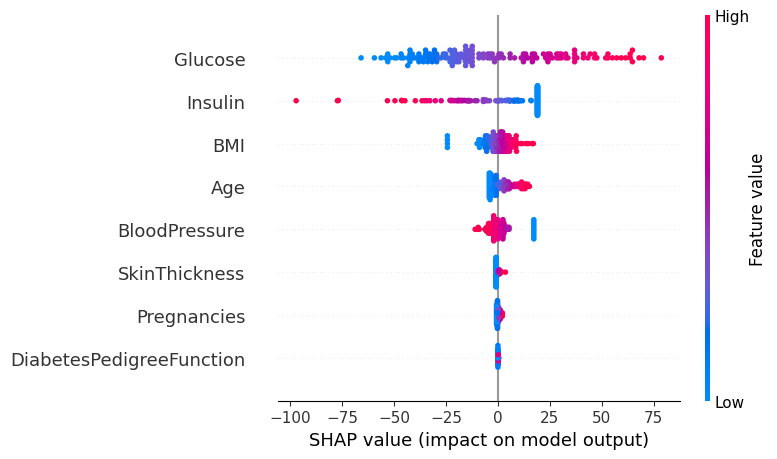

In [16]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [17]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                              feature_names=X_train.columns,
                                              class_names=['No Diabetes', 'Diabetes'],
                                              mode='classification')
exp = explainer.explain_instance(X_test.values[0], model.predict_proba)
exp.show_in_notebook(show_table=True)


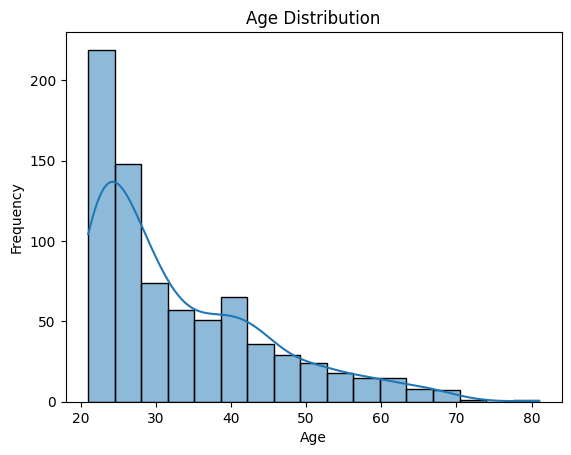

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and `age` is a column in your DataFrame
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


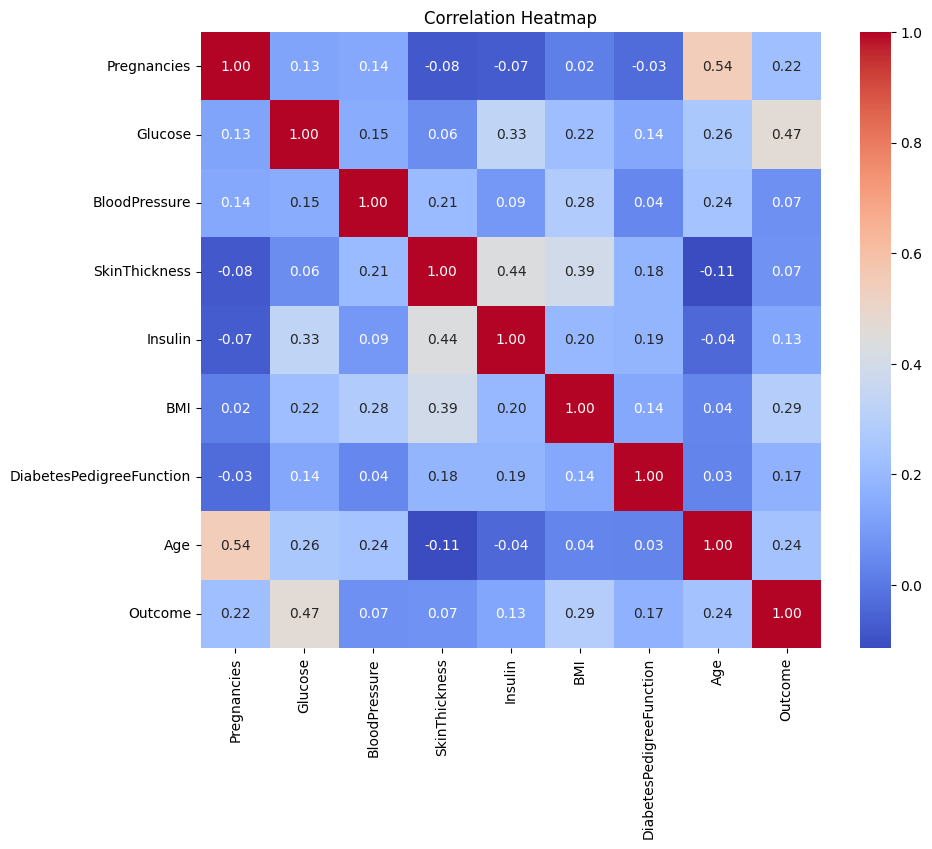

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


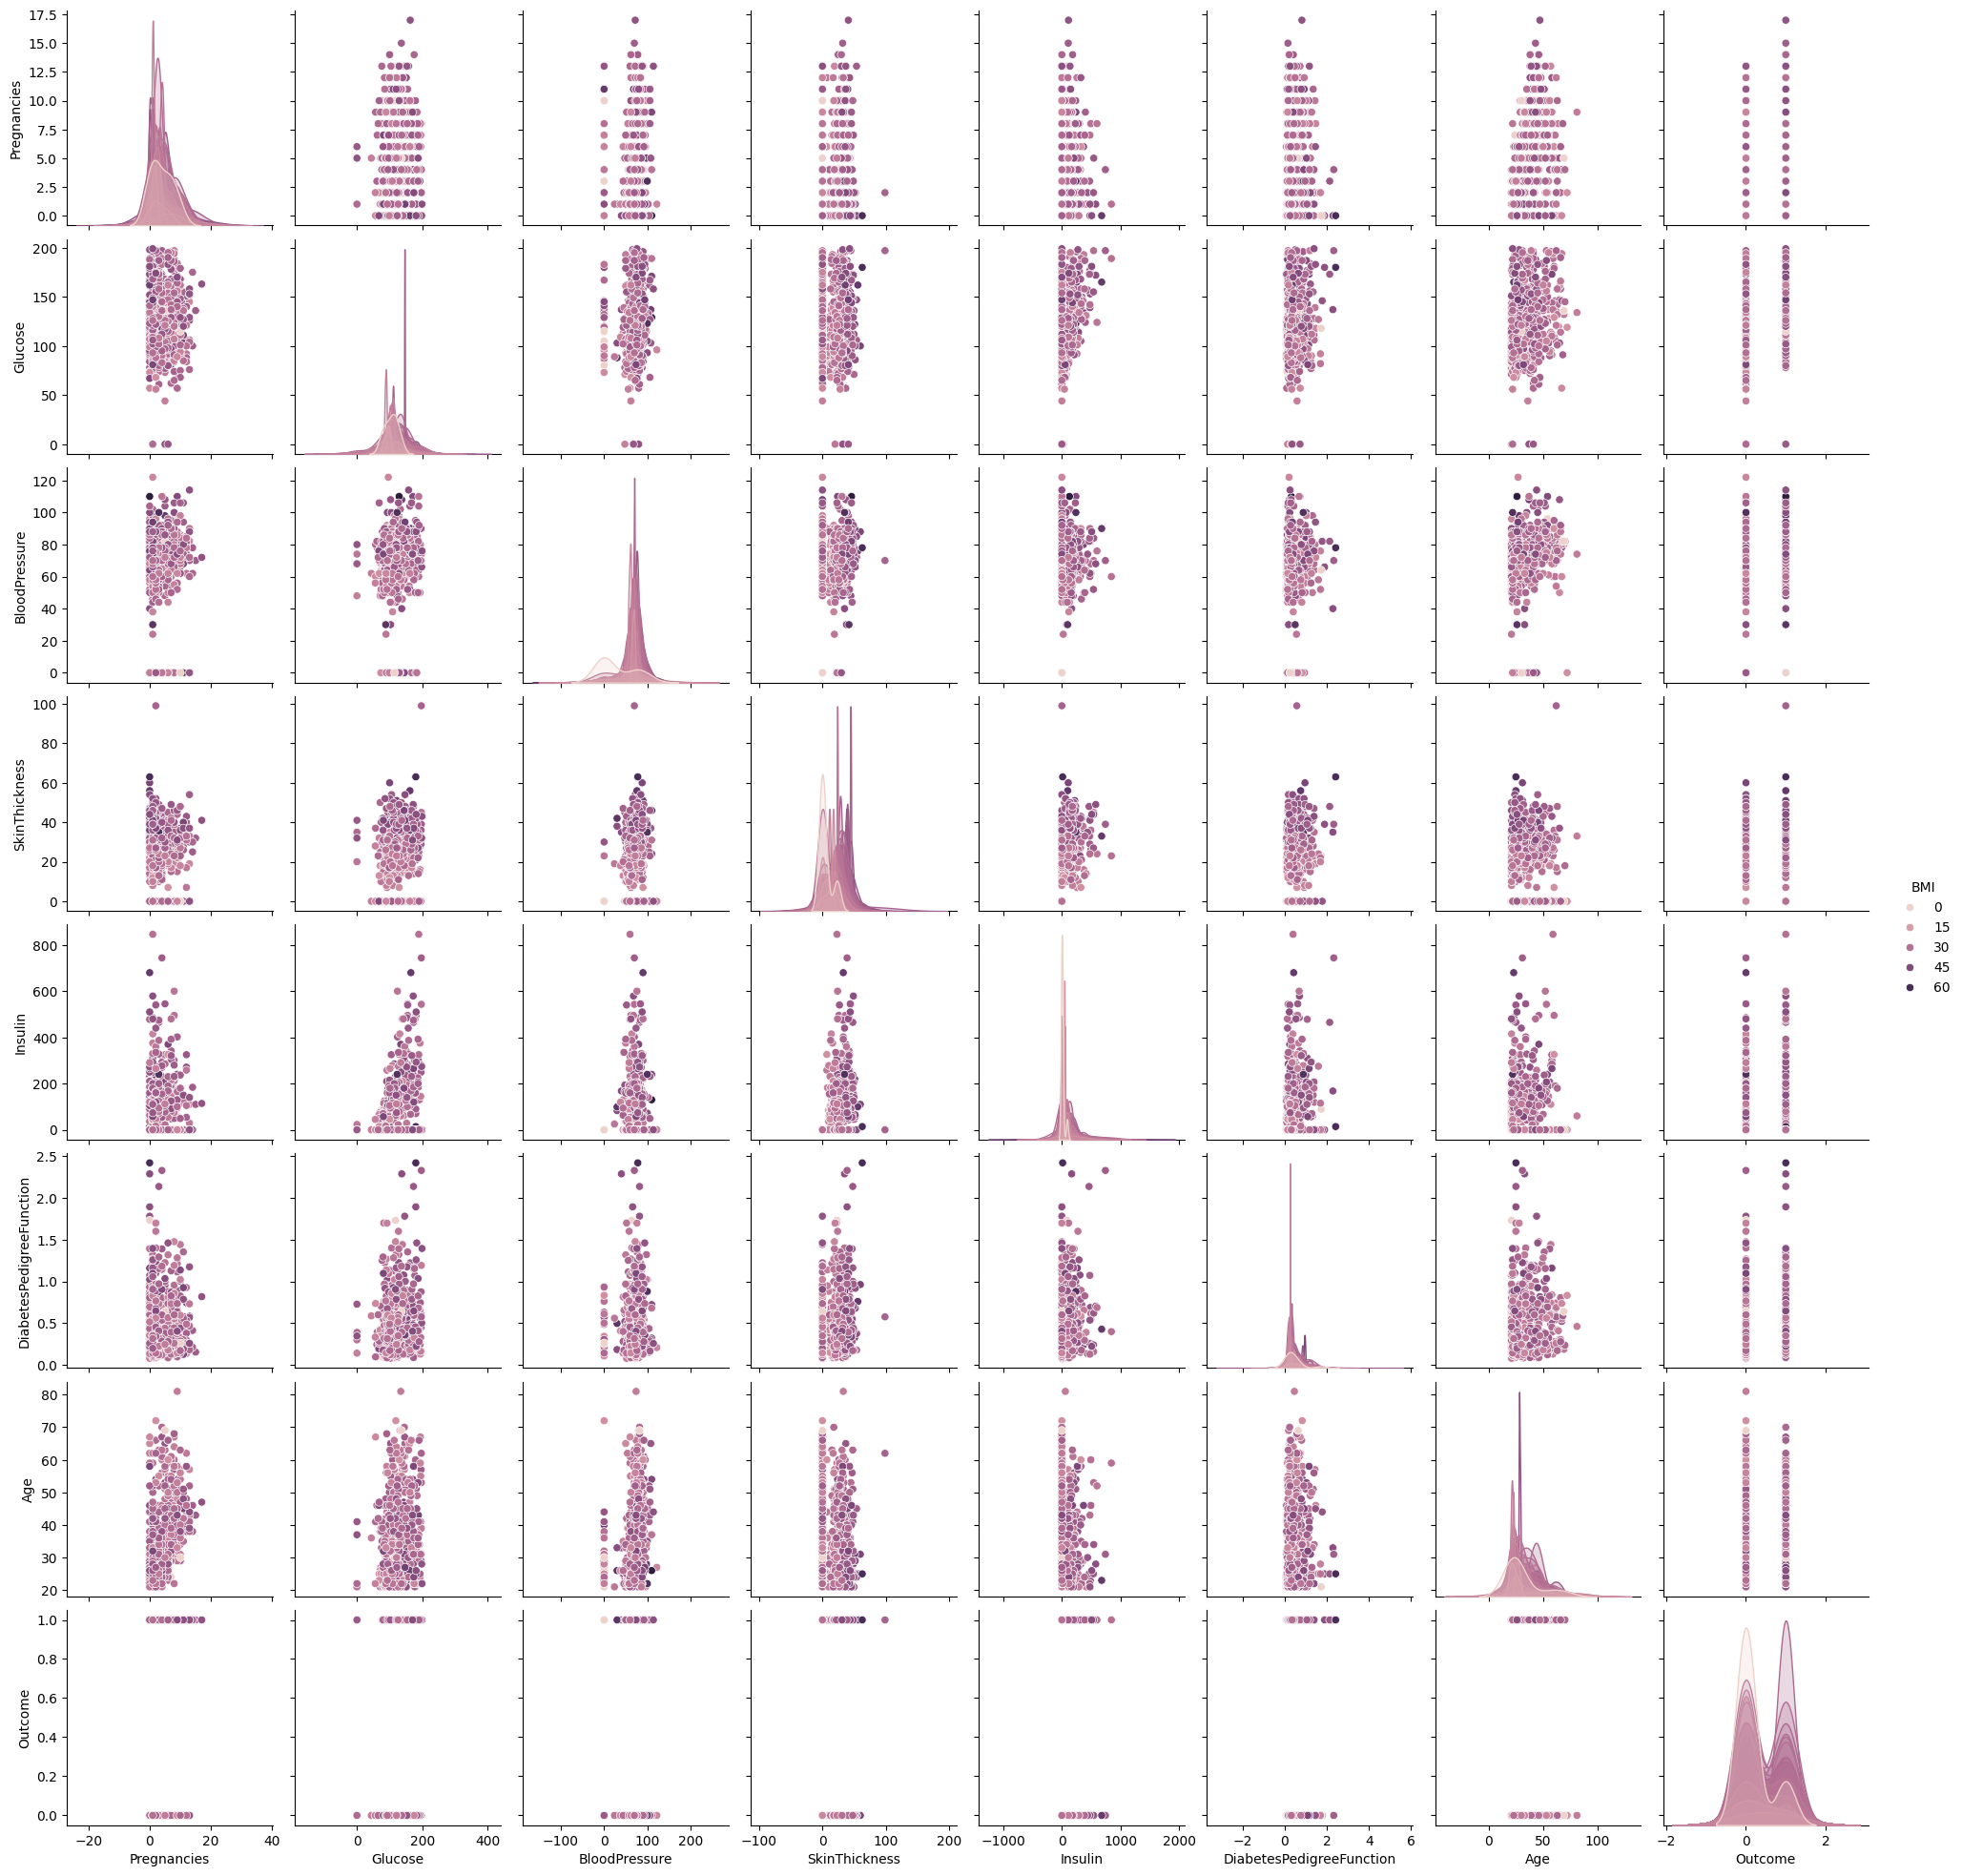

In [25]:
sns.pairplot(df, hue='BMI')  # Assuming 'Outcome' is your target variable
plt.show()


In [ ]:
sns.boxplot(x='Outcome', y='age', data=df)  # Replace 'age' with any continuous variable
plt.title('Age Distribution by Outcome')
plt.show()


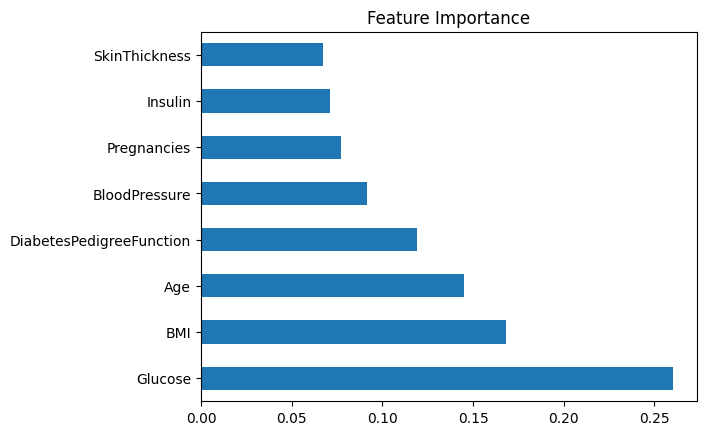

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are your features and target variable
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Plotting feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')  # Top 10 features
plt.title('Feature Importance')
plt.show()


In [32]:
import pandas as pd

def data_summary(df):
    # Dataset dimensions
    print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

    # Missing values
    missing_values = df.isnull().sum()
    columns_with_missing = missing_values[missing_values > 0]
    if not columns_with_missing.empty:
        print("Columns with missing values:")
        print(columns_with_missing)
    else:
        print("There are no missing values in the dataset.")
    
    # Data types
    print("\nColumn data types:")
    print(df.dtypes)

    # Basic statistical summary
    print("\nStatistical summary of numeric features:")
    print(df.describe())
    
    # Unique values for categorical data
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("\nUnique values in categorical columns:")
        for col in categorical_cols:
            print(f"{col}: {df[col].nunique()} unique values")

def main():
    # Load the dataset (update the path to your dataset file)
    df = pd.read_csv('diabetes.csv')

    # Generate the data summary
    data_summary(df)

if __name__ == "__main__":
    main()


The dataset contains 768 rows and 9 columns.
There are no missing values in the dataset.

Column data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Statistical summary of numeric features:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.0